# Final Project Report

* Class: DS 5100
* Student Name: Qais Youssef
* Student Net ID: qmy6cv
* This URL: https://github.com/qmyhd/DS5100-FinalProject-qmy6cv/blob/2d3b7ceb44ef6958b37b9fb2592e2927fc2af518/ds5100_final_project_files/DS51200_FinalProjectQais.ipynb

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/qmyhd/DS5100-FinalProject-qmy6cv.git

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```

# A code block with your classes.
import numpy as np
import pandas as pd

class Die:
    """A class representing a die with customizable faces and weights."""

    def __init__(self, faces):
        """
        Initialize the die with faces and default weights.

        Parameters:
        faces (numpy.ndarray): An array of faces for the die. Must be strings or numbers.

        Raises:
        TypeError: If faces is not a NumPy array.
        ValueError: If faces do not have unique values.
        """
        if not isinstance(faces, np.ndarray):
            raise TypeError("Faces must be a NumPy array")
        if len(faces) != len(np.unique(faces)):
            raise ValueError("Faces must have unique values")
        self._faces = faces
        self._weights = np.ones_like(faces, dtype=float)
        self._die_df = pd.DataFrame({'weights': self._weights}, index=self._faces)

    def change_weight(self, face, new_weight):
        """
        Change the weight of a specific face.

        Parameters:
        face: The face value to be changed.
        new_weight: The new weight for the specified face.

        Raises:
        ValueError: If the face is not in the die faces.
        TypeError: If the new weight is not numeric.
        """
        if face not in self._faces:
            raise ValueError("Face not found in die faces")
        if not isinstance(new_weight, (int, float)):
            raise TypeError("Weight must be numeric")
        self._die_df.loc[face, 'weights'] = new_weight

    def roll(self, times=1):
        """
        Roll the die a specified number of times.

        Parameters:
        times (int): The number of times to roll the die. Defaults to 1.

        Returns:
        list: A list of outcomes from the rolls.
        """
        return list(np.random.choice(self._faces, size=times, p=self._die_df['weights'] / self._die_df['weights'].sum()))

    def show(self):
        """
        Return the current state of the die.

        Returns:
        pandas.DataFrame: A DataFrame containing faces and their weights.
        """
        return self._die_df.copy()


class Game:
    """A class representing a game with multiple dice."""

    def __init__(self, dice):
        """
        Initialize the game with a list of dice.

        Parameters:
        dice (list): A list of already instantiated Die objects.
        """
        self._dice = dice

    def play(self, rolls):
        """
        Roll all dice a specified number of times.

        Parameters:
        rolls (int): The number of times the dice should be rolled.
        """
        results = {i: die.roll(rolls) for i, die in enumerate(self._dice)}
        self._results_df = pd.DataFrame(results)

    def show_results(self, form='wide'):
        """
        Return the results of the most recent play.

        Parameters:
        form (str): The format of the results, 'wide' or 'narrow'. Defaults to 'wide'.

        Returns:
        pandas.DataFrame: The results in the specified format.

        Raises:
        ValueError: If the form is not 'wide' or 'narrow'.
        """
        if form == 'wide':
            return self._results_df.copy()
        elif form == 'narrow':
            return self._results_df.melt(var_name='die', value_name='result')
        else:
            raise ValueError("Invalid format. Choose 'wide' or 'narrow'.")


class Analyzer:
    """A class for analyzing the results of a game."""

    def __init__(self, game):
        """
        Initialize the analyzer with a game object.

        Parameters:
        game (Game): A Game object to be analyzed.

        Raises:
        ValueError: If the input is not a Game object.
        """
        if not isinstance(game, Game):
            raise ValueError("Input must be a Game object")
        self._results_df = game.show_results()

    def jackpot(self):
        """
        Count the number of jackpots in the game.

        Returns:
        int: The number of jackpots.
        """
        return int((self._results_df.nunique(axis=1) == 1).sum())

    def face_counts_per_roll(self):
        """
        Count the occurrences of each face per roll.

        Returns:
        pandas.DataFrame: A DataFrame with roll numbers as index and face counts as columns.
        """
        return self._results_df.apply(pd.Series.value_counts, axis=1).fillna(0)

    def combo_counts(self):
        """
        Count the distinct combinations of faces rolled.

        Returns:
        pandas.DataFrame: A DataFrame with counts of distinct combinations.
        """
        combos = self._results_df.apply(lambda row: tuple(sorted(row)), axis=1)
        return combos.value_counts().reset_index(name='count').rename(columns={'index': 'combo'})

    def permutation_counts(self):
        """
        Count the distinct permutations of faces rolled.

        Returns:
        pandas.DataFrame: A DataFrame with counts of distinct permutations.
        """
        perms = self._results_df.apply(tuple, axis=1)
        return perms.value_counts().reset_index(name='count').rename(columns={'index': 'permutation'})
    ```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```
import unittest
import numpy as np
import pandas as pd
from montecarlo.montecarlo import Die, Game, Analyzer
class TestDie(unittest.TestCase):

    def setUp(self):
        self.die = Die(np.array([1, 2, 3, 4, 5, 6]))

    def test_faces_not_numpy_array(self):
        """Check that input for faces is a numpy array."""
        faces = ['a', 'b', 'c']
        with self.assertRaises(TypeError):
            Die(faces)

    def test_faces_unique(self):
        """Check that faces array contains unique values."""
        faces = np.array([1, 2, 2])
        with self.assertRaises(ValueError):
            Die(faces)

    def test_change_weight(self):
        """Check setting weight to a valid numeric value."""
        self.die.change_weight(1, 2.0)
        self.assertEqual(self.die._die_df.loc[1, 'weights'], 2.0)

    def test_roll(self):
        """Check rolling die with valid number of rolls."""
        result = self.die.roll(10)
        self.assertEqual(len(result), 10)
        for face in result:
            self.assertIn(face, self.die._faces)

    def test_show(self):
        """Check getting die weights."""
        df = self.die.show()
        self.assertTrue(isinstance(df, pd.DataFrame))


class TestGame(unittest.TestCase):

    def setUp(self):
        self.die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        self.die2 = Die(np.array([1, 2, 3, 4, 5, 6]))
        self.game = Game([self.die1, self.die2])

    def test_play(self):
        """Check playing game with valid number of rolls."""
        self.game.play(10)
        self.assertEqual(self.game._results_df.shape, (10, 2))

    def test_show_results(self):
        """Check retrieving play results with valid format."""
        self.game.play(10)
        df_wide = self.game.show_results('wide')
        self.assertEqual(df_wide.shape, (10, 2))
        df_narrow = self.game.show_results('narrow')
        self.assertEqual(df_narrow.shape, (20, 2))


class TestAnalyzer(unittest.TestCase):

    def setUp(self):
        self.die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        self.die2 = Die(np.array([1, 2, 3, 4, 5, 6]))
        self.game = Game([self.die1, self.die2])
        self.game.play(10)
        self.analyzer = Analyzer(self.game)

    def test_jackpot(self):
        """Check computing jackpot count."""
        jackpots = self.analyzer.jackpot()
        self.assertTrue(isinstance(jackpots, int))
        self.assertGreaterEqual(jackpots, 0)

    def test_face_counts_per_roll(self):
        """Check face counts per roll."""
        df = self.analyzer.face_counts_per_roll()
        self.assertTrue(isinstance(df, pd.DataFrame))

    def test_combo_counts(self):
        """Check combination counts."""
        df = self.analyzer.combo_counts()
        self.assertTrue(isinstance(df, pd.DataFrame))

    def test_permutation_counts(self):
        """Check permutation counts."""
        df = self.analyzer.permutation_counts()
        self.assertTrue(isinstance(df, pd.DataFrame))


if __name__ == '__main__':
    unittest.main()
``` 

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

```
(myenv) C:\Users\qaism\OneDrive - University of Virginia\Documents\GitHub\DS5100-FinalProject-qmy6cv>python -m unittest montecarlo/montecarlo_test.py -v > test_results.txt
test_combo_counts (montecarlo.montecarlo_test.TestAnalyzer.test_combo_counts)
Check combination counts. ... ok
test_face_counts_per_roll (montecarlo.montecarlo_test.TestAnalyzer.test_face_counts_per_roll)
Check face counts per roll. ... ok
test_jackpot (montecarlo.montecarlo_test.TestAnalyzer.test_jackpot)
Check computing jackpot count. ... ok
test_permutation_counts (montecarlo.montecarlo_test.TestAnalyzer.test_permutation_counts)
Check permutation counts. ... ok
test_change_weight (montecarlo.montecarlo_test.TestDie.test_change_weight)
Check setting weight to a valid numeric value. ... ok
test_faces_not_numpy_array (montecarlo.montecarlo_test.TestDie.test_faces_not_numpy_array)
Check that input for faces is a numpy array. ... ok
test_faces_unique (montecarlo.montecarlo_test.TestDie.test_faces_unique)
Check that faces array contains unique values. ... ok
test_roll (montecarlo.montecarlo_test.TestDie.test_roll)
Check rolling die with valid number of rolls. ... ok
test_show (montecarlo.montecarlo_test.TestDie.test_show)
Check getting die weights. ... ok
test_play (montecarlo.montecarlo_test.TestGame.test_play)
Check playing game with valid number of rolls. ... ok
test_show_results (montecarlo.montecarlo_test.TestGame.test_show_results)
Check retrieving play results with valid format. ... ok

----------------------------------------------------------------------
Ran 11 tests in 0.041s

OK

```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
import sys
import os
dir = os.getcwd()
mon = os.path.join(dir, 'montecarlo')
sys.path.append(mon)
import montecarlo.montecarlo as mc


## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
help(mc)

Help on module montecarlo.montecarlo in montecarlo:

NAME
    montecarlo.montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  A class for analyzing the results of a game.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      Initialize the analyzer with a game object.
     |      
     |      Parameters:
     |      game (Game): A Game object to be analyzed.
     |      
     |      Raises:
     |      ValueError: If the input is not a Game object.
     |  
     |  combo_counts(self)
     |      Count the distinct combinations of faces rolled.
     |      
     |      Returns:
     |      pandas.DataFrame: A DataFrame with counts of distinct combinations.
     |  
     |  face_counts_per_roll(self)
     |      Count the occurrences of each face per roll.
     |      
     |      Returns:
     |      pandas.DataFrame: A DataFrame with roll numb

In [3]:
#help(mc.Die)
#help(mc.Game)
#help(mc.Analyzer)

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/qmyhd/DS5100-FinalProject-qmy6cv/blob/2d3b7ceb44ef6958b37b9fb2592e2927fc2af518/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

In [4]:
!pip install git+https://github.com/qmyhd/DS5100-FinalProject-qmy6cv.git

  Cloning https://github.com/qmyhd/DS5100-FinalProject-qmy6cv.git to c:\users\qaism\appdata\local\temp\pip-req-build-dpgqi9ue
  Resolved https://github.com/qmyhd/DS5100-FinalProject-qmy6cv.git to commit 2d3b7ceb44ef6958b37b9fb2592e2927fc2af518
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/qmyhd/DS5100-FinalProject-qmy6cv.git 'C:\Users\qaism\AppData\Local\Temp\pip-req-build-dpgqi9ue'


# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


fair_coin = mc.Die(np.array(['H', 'T']))
unfair_coin = mc.Die(np.array(['H', 'T']))
unfair_coin.change_weight('H', 5)
print("Fair coin weights:")
print(fair_coin.show())
print("\nUnfair coin weights:")
print(unfair_coin.show())


Fair coin weights:
   weights
H      1.0
T      1.0

Unfair coin weights:
   weights
H      5.0
T      1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [6]:
game_fair = mc.Game([fair_coin, fair_coin])
game_fair.play(1000)
print("Game results (two fair coins):")
print(game_fair.show_results())


Game results (two fair coins):
     0  1
0    H  H
1    H  H
2    H  T
3    T  H
4    T  T
..  .. ..
995  H  H
996  H  H
997  T  T
998  H  T
999  T  T

[1000 rows x 2 columns]


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [7]:
game_mixed = mc.Game([unfair_coin, unfair_coin, fair_coin])
game_mixed.play(1000)
print("Game results (two unfair coins and one fair coin):")
print(game_mixed.show_results())


Game results (two unfair coins and one fair coin):
     0  1  2
0    T  H  H
1    T  H  H
2    H  T  T
3    H  H  H
4    H  H  T
..  .. .. ..
995  H  T  T
996  H  H  H
997  H  H  T
998  H  H  H
999  H  H  T

[1000 rows x 3 columns]


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [8]:
analyzer_fair = mc.Analyzer(game_fair)
analyzer_mixed = mc.Analyzer(game_mixed)

fair_jackpot_count = analyzer_fair.jackpot()
mixed_jackpot_count = analyzer_mixed.jackpot()

print(f"Jackpot count for fair coins game: {fair_jackpot_count}")
print(f"Jackpot count for mixed coins game: {mixed_jackpot_count}")

Jackpot count for fair coins game: 462
Jackpot count for mixed coins game: 341


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [9]:
fair_freq = fair_jackpot_count / 1000
mixed_freq = mixed_jackpot_count / 1000

print(f"Relative jackpot frequency for fair coins game: {fair_freq}")
print(f"Relative jackpot frequency for mixed coins game: {mixed_freq}")

Relative jackpot frequency for fair coins game: 0.462
Relative jackpot frequency for mixed coins game: 0.341


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

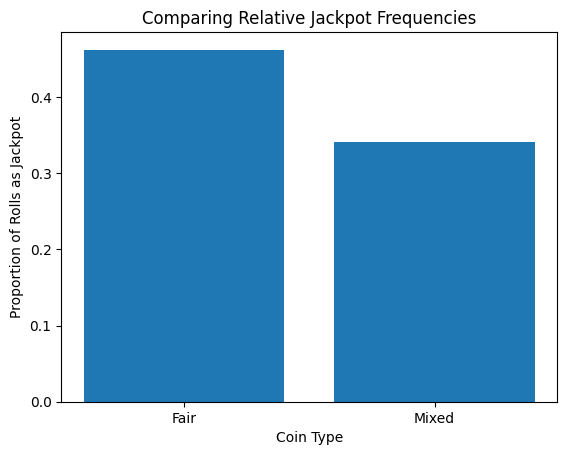

In [10]:
plt.bar(['Fair', 'Mixed'], [fair_freq, mixed_freq])
plt.title("Comparing Relative Jackpot Frequencies")
plt.xlabel("Coin Type")
plt.ylabel("Proportion of Rolls as Jackpot")
plt.show()

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [11]:
die1 = mc.Die(np.array([1, 2, 3, 4, 5, 6]))
die2 = mc.Die(np.array([1, 2, 3, 4, 5, 6]))
die3 = mc.Die(np.array([1, 2, 3, 4, 5, 6]))
print(die1.show())


   weights
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0


Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [12]:
die2.change_weight(6, 5)
print(die2.show())


   weights
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [13]:
die3.change_weight(1, 5)
print(die3.show())


   weights
1      5.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [14]:
game_fair = mc.Game([die1, die1, die1, die1, die1])
game_fair.play(10000)
print(game_fair.show_results())


      0  1  2  3  4
0     6  5  2  6  2
1     6  2  4  4  1
2     2  6  1  3  5
3     6  6  1  5  6
4     1  4  3  4  3
...  .. .. .. .. ..
9995  2  2  5  1  1
9996  5  6  2  2  1
9997  3  2  3  1  3
9998  1  6  3  1  4
9999  1  5  1  5  2

[10000 rows x 5 columns]


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [15]:
game_unfair = mc.Game([die2, die3, die1, die1, die1])
game_unfair.play(10000)

print(game_unfair.show_results())

      0  1  2  3  4
0     6  1  6  3  6
1     2  1  6  1  4
2     2  1  4  4  6
3     6  5  1  3  1
4     3  6  4  4  2
...  .. .. .. .. ..
9995  6  1  1  3  4
9996  4  1  4  1  3
9997  5  4  1  6  2
9998  6  1  3  5  2
9999  6  6  5  5  6

[10000 rows x 5 columns]


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

In [16]:
analyzer_fair = mc.Analyzer(game_fair)
analyzer_unfair = mc.Analyzer(game_unfair)

fair_jackpots = analyzer_fair.jackpot()
unfair_jackpots = analyzer_unfair.jackpot()
fair_freq = fair_jackpots / 1000
unfair_freq = unfair_jackpots / 1000
print(f"Relative jackpot frequency for fair dice game: {fair_freq}")
print(f"Relative jackpot frequency for unfair dice game: {unfair_freq}")

Relative jackpot frequency for fair dice game: 0.015
Relative jackpot frequency for unfair dice game: 0.005


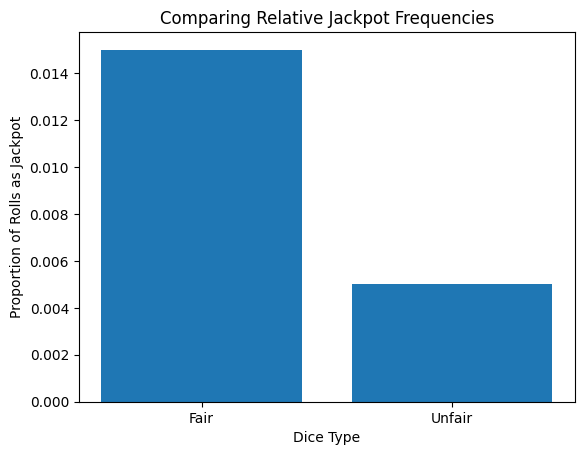

In [17]:
plt.bar(['Fair', 'Unfair'], [fair_freq, unfair_freq])
plt.title("Comparing Relative Jackpot Frequencies")
plt.xlabel("Dice Type")
plt.ylabel("Proportion of Rolls as Jackpot")
plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [18]:
file_path = 'C:/Users/qaism/OneDrive - University of Virginia/Documents/GitHub/DS5100-FinalProject-qmy6cv/english_letters.txt'

letter_freqs = {}
with open(file_path, 'r') as file:
    for line in file:
        letter, freq = line.split()
        letter_freqs[letter] = int(freq)
        
faces = np.array(list(letter_freqs.keys()))
weights = np.array(list(letter_freqs.values()), dtype=float)

letter_die = mc.Die(faces)
for face, weight in letter_freqs.items():
    letter_die.change_weight(face, weight)

print(letter_die.show())


       weights
E  529117365.0
T  390965105.0
A  374061888.0
O  326627740.0
I  320410057.0
N  313720540.0
S  294300210.0
R  277000841.0
H  216768975.0
L  183996130.0
D  169330528.0
C  138416451.0
U  117295780.0
M  110504544.0
F   95422055.0
G   91258980.0
P   90376747.0
W   79843664.0
Y   75294515.0
B   70195826.0
V   46337161.0
K   35373464.0
J    9613410.0
X    8369915.0
Z    4975847.0
Q    4550166.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [19]:
dice = [letter_die, letter_die, letter_die, letter_die]
game = mc.Game(dice)
game.play(1000)
results = game.show_results()
print(results)

     0  1  2  3
0    S  T  F  E
1    M  R  S  S
2    O  A  O  T
3    O  E  E  O
4    T  H  I  N
..  .. .. .. ..
995  S  N  P  I
996  D  H  R  A
997  G  E  N  E
998  E  S  G  B
999  I  T  W  Y

[1000 rows x 4 columns]


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [20]:
wordpath = 'C:/Users/qaism/OneDrive - University of Virginia/Documents/GitHub/DS5100-FinalProject-qmy6cv/scrabble_words.txt'

with open(wordpath, 'r') as file:
    english_words = set(file.read().split())

analyzer = mc.Analyzer(game)
permutations_df = analyzer.permutation_counts()

actual_words_count = permutations_df[permutations_df['permutation'].apply(lambda x: ''.join(x) in english_words)].shape[0]
print(f"Number of actual English words from permutations: {actual_words_count}")

Number of actual English words from permutations: 64


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [24]:
dice = [letter_die, letter_die, letter_die, letter_die, letter_die]
game = mc.Game(dice)
game.play(1000)
results = game.show_results()

print(results)

analyzer = mc.Analyzer(game)
permutations_df = analyzer.permutation_counts()
actual_count = permutations_df[permutations_df['permutation'].apply(lambda x: ''.join(x) in english_words)].shape[0]
print(f"Number of actual English words from 5 dice: {actual_count}")

     0  1  2  3  4
0    I  F  F  C  E
1    L  H  O  D  E
2    P  D  H  I  C
3    G  I  A  E  A
4    J  A  K  X  O
..  .. .. .. .. ..
995  W  D  I  C  S
996  N  O  A  U  R
997  N  I  E  O  O
998  S  M  T  P  R
999  E  N  S  N  I

[1000 rows x 5 columns]
Number of actual English words from 5 dice: 10


In [25]:
dice_4 = [letter_die, letter_die, letter_die, letter_die]
game_4 = mc.Game(dice_4)
game_4.play(1000)
results_4 = game_4.show_results()

analyzer_4 = mc.Analyzer(game_4)
permutations_df_4 = analyzer_4.permutation_counts()
actualcount_4 = permutations_df_4[permutations_df_4['permutation'].apply(lambda x: ''.join(x) in english_words)].shape[0]
print(f"Number of actual English words from 4 dice: {actualcount_4}")

Number of actual English words from 4 dice: 43


In [26]:
if actual_count > actualcount_4:
    print("5 dice produce more words.")
elif actual_count < actualcount_4:
    print("4 dice produce more words.")
else:
    print("Both produce the same number of words.")


4 dice produce more words.
